# Classification for Data Exploration -- Decision Trees

Before we start, we need to install a couple of things (in this order), which will make it possible to visualize decision trees. The instructions are different for MAC and Windows systems.

### MAC

<p>Open the Terminal and do the following:</p>
<p>
<ol>
  <li>Run the following command and hit 'Enter': 
    <pre><code>xcode-select –install</code></pre>
  <li>Run the Xcode installer. Once the installation is complete run the following command to install brew. 
    <pre><code>ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install)"</code></pre> </li>
  <li>Run the following command once you're done to ensure Homebrew is installed and working
    <pre><code>brew doctor</code></pre>
  <li>Enter the command below to install graphviz: 
    <pre><code>brew install graphviz</code></pre>
  <li>Install pydotplus: 
    <pre><code>pip install pydotplus</code></pre>
</ol>
</p>

### WINDOWS

<ol>
<li>Download and install the msi file of grphicviz
<li>Add the executables (e.g., C:\Program Files (x86)\Graphviz2.38\bin) to the path
<li>Install pydotplus by executing this in a terminal: <pre><code>pip install pydotplus</code></pre>
</ol>

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

Populating the interactive namespace from numpy and matplotlib


Data from here <href>https://www.kaggle.com/uciml/adult-census-income</href>

In [7]:
df = pd.read_csv('adult.csv')

In [8]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Let's try to train a decision tree to predict income

In [9]:
dt = tree.DecisionTreeClassifier(max_depth=2)

We would love to do this:

In [10]:
dt.fit(X=df.drop('income',axis=1), y=df.income)

ValueError: could not convert string to float: United-States

### Two problems with this data

<ol>
<li>We have null values
<li>We need numbers only
</ol>

## Cleaning the data set

In [11]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


replace ? with NaN

In [12]:
df.replace(to_replace='?',value=np.nan,inplace=True)

In [13]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


remove education (we already have education.num)

In [14]:
df.drop('education',axis=1,inplace=True)

In [15]:
df.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


make dummy variables for all categorical variables except income

In [16]:
df = pd.get_dummies(df, columns=['workclass','marital.status',
                        'occupation','relationship','race','sex','native.country'],
               dummy_na=True)

Make income binary

In [17]:
df['income'] = df.income.replace({'<=50K':0.0, '>50K':1.0})

## Train the decision tree

Make X and Y. Remember to take out the dependent variable from X, or else the classification problem becomes trivial!

In [18]:
X = df.drop('income',axis=1)

In [19]:
Y = df.income

Build the tree

In [20]:
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Visualize the tree

In [21]:
len(df)

32561

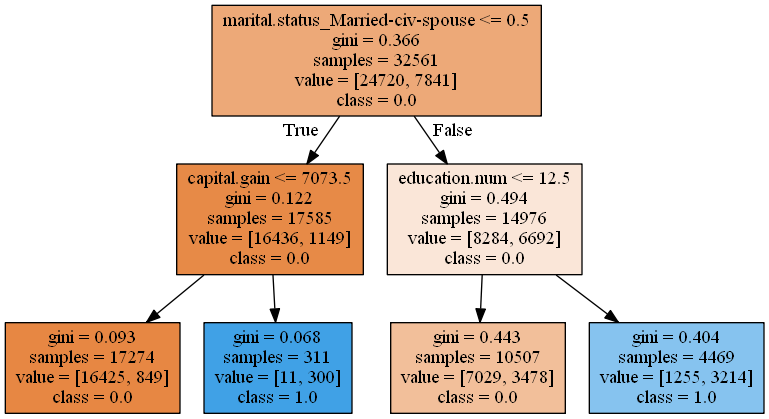

In [22]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

## Validating the finding

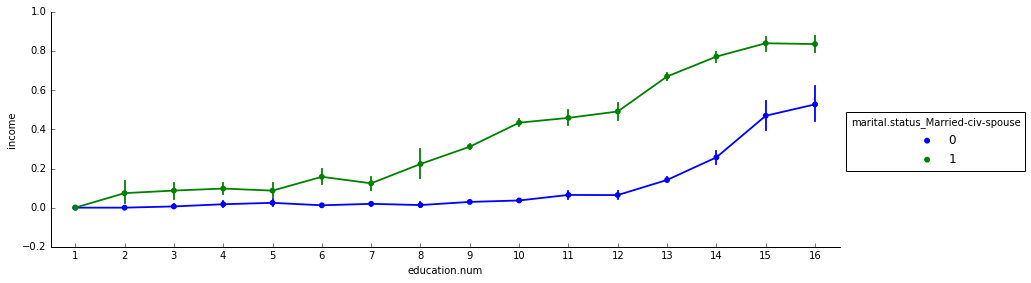

In [23]:
sns.factorplot(x='education.num',y='income',hue='marital.status_Married-civ-spouse',data=df,
              aspect =3)

Education.num = 12.5 is a good threshold to separate low income from high income, but it is more effective for those married civilly (right part of the tree)


In [26]:
df2 = df.copy()

In [34]:
df2['binned_capital_gain'] = pd.cut(df2['capital.gain'],bins=[0,3500,7000,10500,100000])

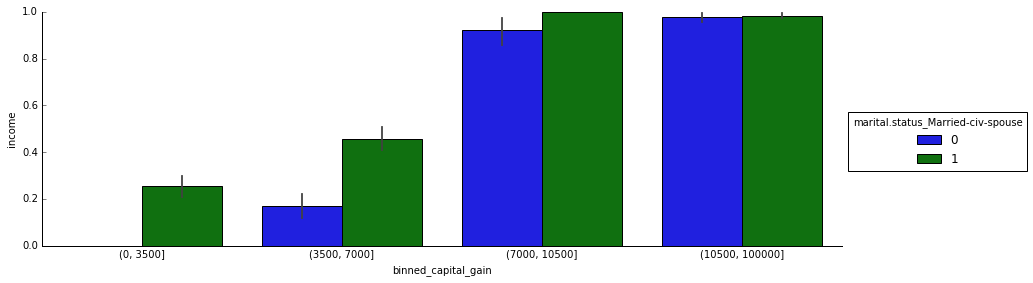

In [36]:
sns.factorplot(x='binned_capital_gain',y='income',data=df2,aspect=3,kind='bar',
               hue='marital.status_Married-civ-spouse')

Capital.gain = 7073 is a good threshold to separate low income from high income, but it is more effective for those NOT married civilly (left part of the tree)
